# Esercizio 12.1

In [1]:
#import os
#os.environ['KMP_DUPLICATE_LIB_OK']='True' #This is needed in my Anaconda+MacOsX installation; leave it commented.
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

2024-06-07 14:04:52.666210: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-07 14:04:52.669037: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-07 14:04:52.706453: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-07 14:04:52.706479: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-07 14:04:52.707727: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [2]:
from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)


In [3]:
# Consider an array of 5 labels out of a set of 3 classes {0, 1, 2}:
labels = np.array([0, 2, 1, 2, 0])
# `to_categorical` converts this into a matrix with as many columns as there are classes.
# The number of rows stays the same.
keras.utils.to_categorical(labels) # accende la posizione

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

X_train shape: (60000, 784)
X_test shape: (10000, 784)

an example of a data point with label 4


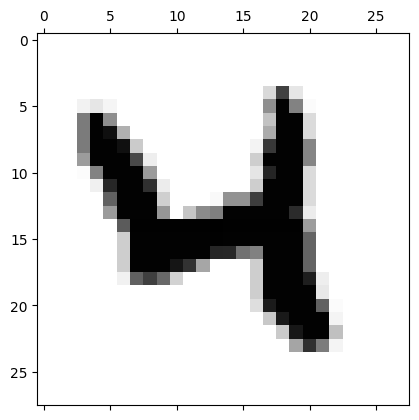

... and with label [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] after to_categorical

X_train shape: (60000, 784)
Y_train shape: (60000, 10)


In [4]:
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print()

# cast to floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# look at an example of data point
print('an example of a data point with label', Y_train[20])
# matshow: display a matrix in a new figure window
plt.matshow(X_train[20,:].reshape(28,28),cmap='binary')
plt.show()

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print('... and with label', Y_train[20], 'after to_categorical')
print()
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

print('Model architecture created successfully!')

Model architecture created successfully!


In [6]:
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adamax, Nadam

def compile_model1():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=SGD(),
                  metrics=['acc'])
    return model

def compile_model2():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=Adam(),
                  metrics=['acc'])
    return model

def compile_model3():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=Adagrad(),
                  metrics=['acc'])
    return model

def compile_model4():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=Adadelta(),
                  metrics=['acc'])
    return model

def compile_model5():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=Adamax(),
                  metrics=['acc'])
    return model

print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


In [7]:
# training parameters
batch_size = 32
epochs = 80

# create the deep neural net
model_DNN = compile_model5()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/80
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4152 - acc: 0.8812 - val_loss: 0.1677 - val_acc: 0.9494
Epoch 2/80
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1995 - acc: 0.9439 - val_loss: 0.1246 - val_acc: 0.9614
Epoch 3/80
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1471 - acc: 0.9589 - val_loss: 0.0982 - val_acc: 0.9686
Epoch 4/80
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1176 - acc: 0.9664 - val_loss: 0.0859 - val_acc: 0.9726
Epoch 5/80
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0970 - acc: 0.9722 - val_loss: 0.0795 - val_acc: 0.9748
Epoch 6/80
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0834 - acc: 0.9766 - val_loss: 0.0724 - val_acc: 0.9767
Epoch 7/80
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0713 - acc: 0.9786 - val_loss: 0.0702 - val_acc: 0.9768
Epoch 8/80
1875/1875 [==============================] - 9

313/313 [==============================] - 1s 3ms/step - loss: 0.0911 - acc: 0.9848

Test loss: 0.09105109423398972
Test acc: 0.9847999811172485


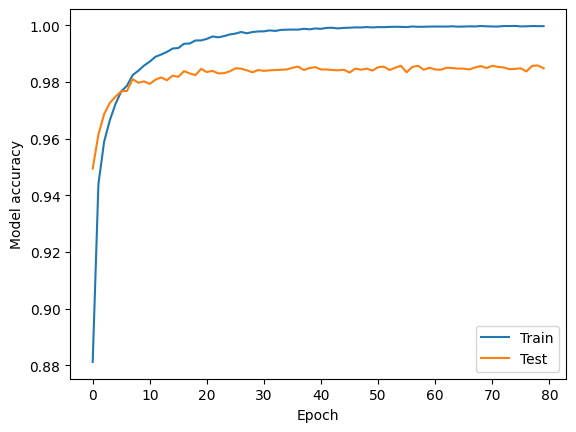

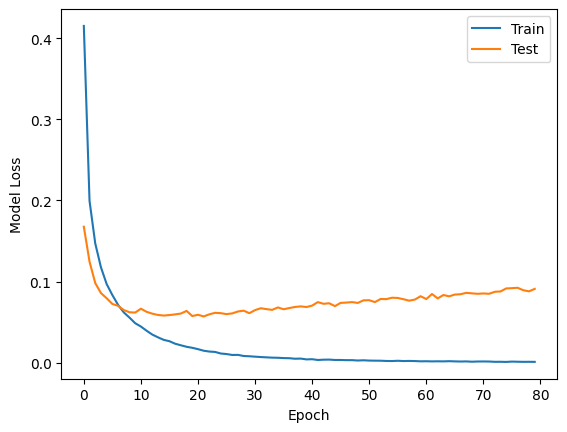

In [8]:
# Evaluate the model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# Print performance
print()
print('Test loss:', score[0])
print('Test acc:', score[1])

# Summarize history for acc
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('Model accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Model Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

# Write history to a .dat file in columnar format with spaces as delimiter
with open('training_history_adamax.dat', 'w') as f:
    # Write the header
    f.write('Epoch accuracy Validation_accuracy Loss Validation_Loss\n')
    # Write the data
    for i in range(len(history.history['acc'])):
        f.write(f"{i+1}  {history.history['acc'][i]}  {history.history['val_acc'][i]}  {history.history['loss'][i]}  {history.history['val_loss'][i]}\n")


In [9]:
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

#plt.figure(figsize=(15, 15)) 
with open("predizioni_adamax.dat", "w") as f:
    for i in range(10000):
        #ax = plt.subplot(2, 10, i + 1)
        #plt.imshow(X_test[i, :, :, 0], cmap='gray')
        true_digit = np.argmax(Y_test[i])
        predicted_digit = np.argmax(predictions[i])
        #plt.title("Digit: {}\nPredicted:  {}".format(true_digit, predicted_digit))
        #plt.axis('off')

        # Scrive la cifra predetta nel file
        f.write(f"{i + 1}   {true_digit}   {predicted_digit}\n")

313/313 [==============================] - 1s 3ms/step


In [10]:
# Supponendo che 'model' sia il tuo modello addestrato
model_DNN.save('adamax.h5')

/home/matteo/anaconda3/envs/tf/lib/python3.9/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
